In [1]:
import pandas as pd
import seaborn as sns
from math import log
from matplotlib import rc
import matplotlib.pyplot as plt

In [2]:
TITLE_SIZE = 20
LABEL_SIZE = 20
NOTE_SIZE = 20
rc('text', usetex=True)

In [3]:
rc = {'lines.linewidth': 2, 
      'axes.labelsize': LABEL_SIZE, 
      'axes.titlesize': TITLE_SIZE, 
      'legend.fontsize': 'x-large',
      'font.family':'lato', 'font.serif':['lato'],
      'axes.facecolor': 'DFDFE5'}
sns.set_context('paper', rc=rc)
sns.set_style('dark', rc=rc)

In [4]:
data = pd.read_csv("all_enrriq_go.csv")

In [5]:
data_sig = data.loc[data['Significative'] == 'YES', ['annotattion', 'evalue', 'Label', 'PSI', 'Condition']]

In [6]:
data_sig["enr"] = data_sig["evalue"].map(lambda e : -log(e, 10))

In [7]:
CHARS = 25
data_sig['bp'] = data_sig["annotattion"].map(lambda a : a)##a.capitalize()[:CHARS] + ("..." if len(a) > CHARS else ""))

In [8]:
data_sig = data_sig.rename({
    'bp': 'Biologic process',
    'enr': 'GO enrichment',
    'Condition': 'Condition',
    'Label': 'Event',
    "PSI": "PSI"
}, axis=1)

/home/mfernandes/.local/lib/python3.7/site-packages/seaborn/axisgrid.py:64: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  self.fig.tight_layout(*args, **kwargs)


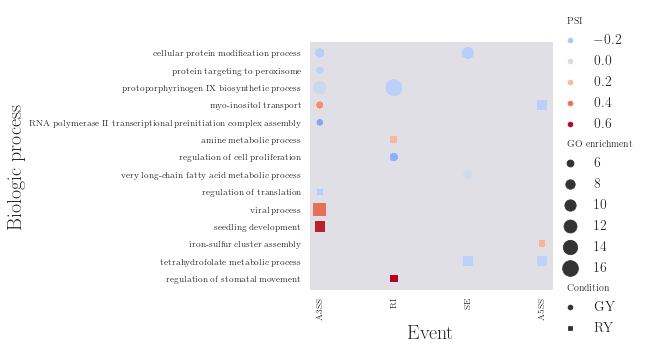

In [20]:
markers = {"GY": "o", "RY": "s"}
g = sns.relplot(
    data=data_sig, x="Event", y="Biologic process", hue="PSI", size="GO enrichment",
    linewidth=0, palette="coolwarm",  hue_norm=(-.6, .6), height=4,
    sizes=(30, 250),style="Condition", markers=markers
)
for label in g.ax.get_xticklabels():
    label.set_rotation(90)

In [21]:
g.savefig("enrriqucimento heatmap.svg")

In [24]:
g.savefig("enrriqucimento heatmap.png", dpi=1200)